**2.1 Mean Reversion Strategy**

This algorithm is a short-term to mid-term trading strategy implemented by calculating the mean of historical prices before a particular price point. A fibonacci function is also called to calculate the support and resistance levels. The support and resistance levels are used to determine the optimal times to buy or sell the stock. The average of the mean and fibonacci ratio is compared to the current price velocity in order to determine the order to be executed.

In [1]:
#Import modules and packages
import yfinance as yf
import numpy as np
#Load yahoo finance api data for Tesla
#retrieving market data
tesla = yf.Ticker("TSLA")
data = tesla.history(interval = "1wk", period = "6mo")
print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2022-10-03 00:00:00-04:00  239.440002  244.580002  222.020004  223.070007   
2022-10-10 00:00:00-04:00  223.929993  226.990005  204.160004  204.990005   
2022-10-17 00:00:00-04:00  210.039993  229.820007  202.000000  214.440002   
2022-10-24 00:00:00-04:00  205.820007  233.809998  198.589996  228.520004   
2022-10-31 00:00:00-04:00  226.190002  237.399994  203.080002  207.470001   
2022-11-07 00:00:00-05:00  208.649994  208.899994  177.119995  195.970001   
2022-11-14 00:00:00-05:00  192.770004  200.820007  176.550003  180.190002   
2022-11-21 00:00:00-05:00  175.850006  185.199997  166.190002  182.860001   
2022-11-28 00:00:00-05:00  179.960007  198.919998  178.750000  194.860001   
2022-12-05 00:00:00-05:00  189.440002  191.270004  169.059998  179.050003   
2022-12-12 00:00:00-05:00  176.100006  177.369995  150.039993  150.229996   

**2.2 Calculating Fibonacci Retracements**

In [2]:
#calculating the fibonacci retracement levels
def fibonacci(ticker, ratio_index):
    # extract closing prices from data
    ratios = [0.236, 0.382, 0.5, 0.618, 0.786]
    prices = []
    for i in range(0,len(ticker)):
        prices.append(data['Close'][i])

    # calculate Fibonacci retracement levels
    high_price = max(prices)
    low_price = min(prices)
    diff = high_price - low_price
    retracement = high_price - (ratios[ratio_index] * diff)
    return retracement

**2.3 Mean Reversion Backtesting Rules**

Similar to the rules of the previous strategy


In [3]:
#Mean Reversion Backtest
def m_reversion_backtest(max_weeks, additional_weeks):
    #initializing variables
    start = 0
    end = 0
    stocks = 0
    portfolio = 100000
    time = []
    price = []
    position = []
    #the end of the data is up to a week maximum which represents the 6 month period
    while end <= max_weeks:
        new_data = tesla.history(interval = "1wk", period = "6mo")
        #additional weeks of data are added on every loop
        end = end + additional_weeks
        new_data = new_data[:end]
        m_1 = new_data['Close'].rolling(window = 1).mean()
        m_2 = new_data['Close'].rolling(window = 2).mean()
        #to drop null values due to yahoo finance's bad API(lol)
        m_1 = m_1.dropna()
        m_2 = m_2.dropna()

        #calculate the fibonacci retracement levels
        #calculate the mean of the entire historical data
        mean = np.mean(new_data['Close'])
        fib = fibonacci(new_data, 2)
        support_resistance = (mean + fib) / 2

        if m_1[-1] > support_resistance:
            if stocks > 0:
                stocks = stocks - 1
                portfolio = portfolio + new_data['Close'][-1]
                time.append(end)
                price.append(new_data['Close'][-1])
                position.append(False)
                print("Sold Tesla Stock @ $", new_data['Close'][-1])
        if m_1[-1] < support_resistance:
            stocks = stocks + 1
            portfolio = portfolio - (new_data['Close'][-1])
            time.append(end)
            price.append(new_data['Close'][-1])
            position.append(True)
            print("Bought Tesla Stock @ $", new_data['Close'][-1])

    print("Realized P/L: ", portfolio - 100000, "\n")
    print("Unrealized P/L: ", (portfolio + (new_data['Close'][-1] * stocks)) - 100000)
    return time, price, position
#26 maximum weeks, with 4 additional weeks
time, price, position = m_reversion_backtest(26,4)


Bought Tesla Stock @ $ 182.86000061035156
Bought Tesla Stock @ $ 123.1500015258789
Bought Tesla Stock @ $ 133.4199981689453
Sold Tesla Stock @ $ 208.30999755859375
Sold Tesla Stock @ $ 180.1300048828125
Sold Tesla Stock @ $ 185.05999755859375
Realized P/L:  134.06999969482422 

Unrealized P/L:  134.06999969482422


**2.4 Plotting the Results**

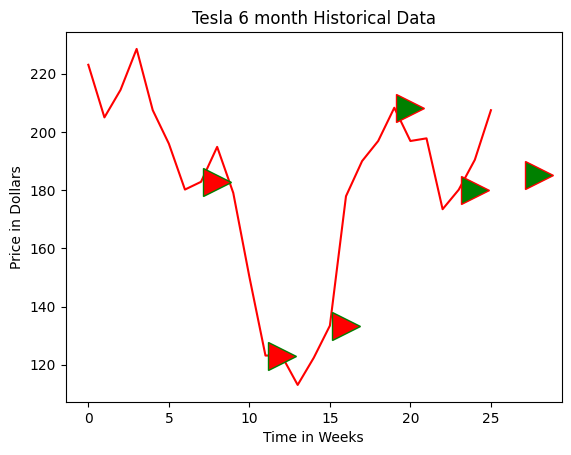

In [4]:
#creating the chart
import matplotlib.pyplot as plt
historical_data = tesla.history(interval = "1wk", period = "6mo")
x = np.arange(0, 26)
y = []

for i in range(0,26):
    y.append(historical_data['Close'][i])

# plotting
plt.title("Tesla 6 month Historical Data")
plt.xlabel("Time in Weeks")
plt.ylabel("Price in Dollars")
plt.plot(x, y, color ="red")

for unit in range(0, len(time)):
    if position[unit]:
        plt.plot(time[unit], price[unit], color ="red", marker=">", markersize=20, markeredgecolor="green",
                 markerfacecolor="red")
    if not position[unit]:
        plt.plot(time[unit], price[unit], color ="green", marker=">", markersize=20, markeredgecolor="red",
                 markerfacecolor="green")
plt.show()